### Load parameters

In [55]:
imagePath = "/Users/Lu/Desktop/SMD/Reports/Code review/2015 Test data/2015 Pig1 1B2/1stcut_1b/"
N_shrink=5
N_frame=5

### Load Packages

In [60]:
from PIL import Image
from skimage.util import img_as_float
from skimage import data
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/Users/Lu/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


### Load images

In [32]:
### Set directory to image file location
os.chdir(imagePath)  

shrink = (slice(0, None, N_shrink), slice(0, None, N_shrink)) # down sample by 10

file_names=glob.glob('*F8*')[0:400] # load 400 PPG images
F=[img_as_float(data.load(imagePath+im_name))[shrink] for im_name in file_names ]

N_row=F[1].shape[0] # number of rows
N_col=F[1].shape[1]
F=np.array(F) # convert from list to 3D image array (400, 209, 282)

### Plot image

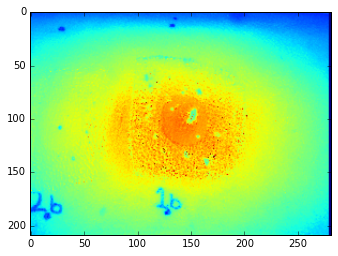

In [59]:
plt.imshow(F[1])
plt.show()

### Check pixel value range

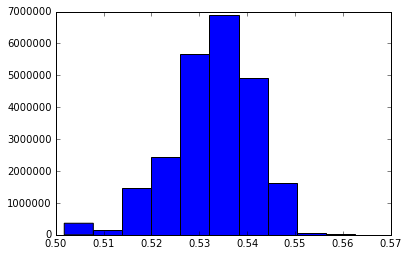

In [75]:
data=np.array(F)
_=plt.hist(data.flatten())

### Calculate frame difference

#### 5 frames apart

In [84]:
Diff=[]
counter=0
for i in range(0,400-N_frame,N_frame):
    Diff.append(abs(np.array(F[i+N_frame-1]-F[i])).sum())
    
# normalize diff by number of pixels per frame
Diff=np.array(Diff)/N_row/N_col

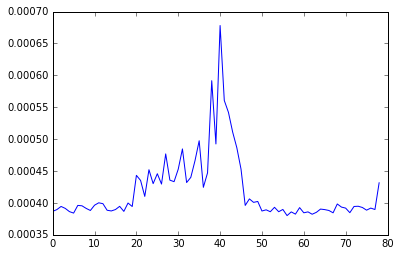

In [81]:
plt.plot(range(len(Diff)),Diff)
plt.show()